<a href="https://colab.research.google.com/github/bajajraj/FinancialDataAnalysis/blob/main/ytestPrediction_BajajRajaditya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### FI 824 Competition
**Raj Bajaj**

This code is part of the competition for FI 824 class written by Raj Bajaj. It is used for detecting the fraud for the given test data. The steps for the algorithm is - 

1.) First all the data is loaded in the required format.

2.) Then the training and testing features are normalized using between the range of 0 and 1 using Min-Max Scaling.

3.) After normalizing the data, a graph visulization is made to look how much the data is imbalanced.

4.) It was seen that the data was too imbalanced, then Synthetic minority over-sampling technique was used which involves generating synthetic samples for minority class using interpolation. 

5) After that, the data is splitted into 80% for training and 20% for testing to see the accuracy.

6) If the current model passes, it is then trained on the whole data for the predicting on the test features provided.

7) In the end, test features are loaded.

In [58]:
# importing modules
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

In [59]:
# Store x_train in Dataframe
df_xtrain = pd.read_csv('x_train.csv')
print("The shape of the x_train is", df_xtrain.shape)

The shape of the x_train is (200000, 27)


In [60]:
# Store the y_train in Datframe
df_ytrain = pd.read_csv('y_train.csv')
print("The shape of the y_train is", df_ytrain.shape)

The shape of the y_train is (200000, 1)


In [61]:
# Store the x_test in DataFrame
df_xtest = pd.read_csv('x_test.csv')
print('The shape of the x_test is', df_xtest.shape)
xtest_id = df_xtest.iloc[:,0].to_numpy()
xtest_id = xtest_id.reshape((xtest_id.shape[0],1))
df_xtest = df_xtest.iloc[:,1:]
print('The shape of the xtest after removing the id column is', df_xtest.shape)

The shape of the x_test is (10000, 28)
The shape of the xtest after removing the id column is (10000, 27)


In [62]:
# Doing some data preprocessing. First, converting the data for normalization using Min-Max Scaling between the range of 0
# to 1

# Create MinMaxScaler object
scaler = MinMaxScaler()
# apply Min-Max scaling to all columns
x_normalized_data = pd.DataFrame(scaler.fit_transform(df_xtrain), columns=df_xtrain.columns)
x_normalized_data

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27
0,0.013166,0.768603,0.266142,0.535434,0.522835,0.541423,0.783392,0.501795,0.502335,0.268482,...,0.544884,0.395308,0.561678,0.491362,0.704808,0.411224,0.543566,0.395226,0.648976,0.257249
1,0.000228,0.801162,0.242514,0.555572,0.538073,0.549635,0.787447,0.457165,0.497903,0.234985,...,0.558398,0.390898,0.556413,0.470343,0.700732,0.265424,0.570273,0.475939,0.657261,0.258859
2,0.031874,0.817670,0.400953,0.527333,0.587932,0.534521,0.793047,0.490613,0.509299,0.335463,...,0.471219,0.406263,0.570319,0.541971,0.692552,0.386553,0.581683,0.485832,0.650151,0.259935
3,0.006867,0.818750,0.186868,0.541694,0.535038,0.542487,0.784022,0.441919,0.521529,0.395007,...,0.536447,0.381165,0.566132,0.586573,0.715858,0.419549,0.571692,0.405871,0.651065,0.248055
4,0.002747,0.817387,0.261164,0.552048,0.543797,0.550565,0.785926,0.441782,0.501923,0.251173,...,0.650606,0.391680,0.556455,0.465054,0.700437,0.299797,0.572812,0.508024,0.648075,0.258368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.001567,0.786132,0.295686,0.568267,0.629324,0.531030,0.803605,0.446723,0.515637,0.236953,...,0.539218,0.385381,0.561330,0.500019,0.703333,0.557150,0.578470,0.423333,0.625833,0.249951
199996,0.007326,0.798893,0.301278,0.542977,0.549272,0.538444,0.786754,0.474722,0.505937,0.253219,...,0.501090,0.393688,0.564249,0.524623,0.698836,0.305282,0.598338,0.396082,0.651660,0.258256
199997,0.001272,0.793069,0.157386,0.553693,0.522448,0.551939,0.782272,0.405393,0.507627,0.253134,...,0.592491,0.393279,0.569585,0.573206,0.695802,0.522766,0.601414,0.453475,0.651952,0.259701
199998,0.000544,0.763356,0.170194,0.532351,0.521483,0.534035,0.797997,0.472407,0.488551,0.327849,...,0.732113,0.383653,0.564374,0.503341,0.702928,0.365480,0.550635,0.409866,0.607199,0.249779


In [63]:
# Doing some data preprocessing for the testing data. First, converting the data for normalization using Min-Max Scaling between the range of 0
# to 1

# Create MinMaxScaler object
scaler = MinMaxScaler()
# apply Min-Max scaling to all columns
x_test_normal = pd.DataFrame(scaler.fit_transform(df_xtest), columns=df_xtest.columns)
x_test_normal

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27
0,0.032553,0.910222,0.341189,0.397284,0.647371,0.504942,0.532419,0.489454,0.622968,0.443035,...,0.333376,0.564041,0.365613,0.541976,0.460346,0.386745,0.463562,0.305064,0.548125,0.354083
1,0.034228,0.890531,0.286885,0.398539,0.602601,0.513235,0.521178,0.482391,0.603566,0.372894,...,0.532484,0.583605,0.366454,0.458963,0.465114,0.428242,0.441955,0.246227,0.542683,0.355124
2,0.171854,0.884603,0.362615,0.377468,0.634545,0.532988,0.521405,0.571121,0.576548,0.412580,...,0.558776,0.636231,0.389235,0.439946,0.431500,0.456363,0.398166,0.537618,0.522672,0.360552
3,0.002005,0.928952,0.296896,0.432033,0.579953,0.529831,0.524459,0.499241,0.575276,0.302925,...,0.287863,0.566504,0.369816,0.528264,0.459218,0.493290,0.454638,0.172260,0.514665,0.344983
4,0.003580,0.925045,0.250642,0.407319,0.595775,0.524374,0.530432,0.500672,0.587573,0.447844,...,0.498587,0.559081,0.369583,0.513748,0.463983,0.523188,0.402421,0.497922,0.493534,0.351277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.001333,0.875178,0.287909,0.439126,0.603210,0.537277,0.525038,0.513412,0.554192,0.442062,...,0.514391,0.571897,0.368919,0.586838,0.455357,0.528347,0.428859,0.484648,0.571632,0.363160
9996,0.000000,0.931703,0.463406,0.408241,0.667453,0.501681,0.539987,0.546054,0.616490,0.405225,...,0.407631,0.561088,0.370348,0.609817,0.464381,0.393939,0.482594,0.405128,0.548942,0.352179
9997,0.004335,0.914797,0.513160,0.431900,0.637301,0.515382,0.538374,0.430076,0.626076,0.235149,...,0.428877,0.573408,0.380944,0.631502,0.472501,0.529887,0.297584,0.335882,0.556788,0.356630
9998,0.003579,0.943029,0.210560,0.401206,0.604865,0.506201,0.536501,0.461310,0.588910,0.255981,...,0.519802,0.572194,0.383339,0.636585,0.454181,0.418276,0.493944,0.327979,0.537545,0.349612


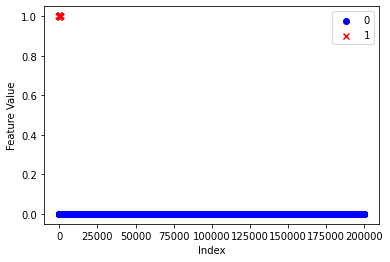

In [64]:
# Creating some plot to see the data seperation
# separate 0 and 1 values into two Series
zeros = df_ytrain.loc[df_ytrain['isfraud'] == 0, 'isfraud']
ones = df_ytrain.loc[df_ytrain['isfraud'] == 1, 'isfraud']

# create scatter plots for 0 and 1 values
plt.scatter(range(len(zeros)), zeros, color='blue', marker='o', label='0')
plt.scatter(range(len(ones)), ones, color='red', marker='x', label='1')

# add axis labels and legend
plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.legend()

# show plot
plt.show()

In [65]:
# Now it can be seen that there are much more of 0s than 1s in our data, so it best to reduce the number of 0s to not
# have a bias machine learning training data.

# Let us first look at the number of 0s and 1s
print('The number of 0s are', len(zeros))
print('The number of 1s are', len(ones))
x_normalized_data

The number of 0s are 199647
The number of 1s are 353


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27
0,0.013166,0.768603,0.266142,0.535434,0.522835,0.541423,0.783392,0.501795,0.502335,0.268482,...,0.544884,0.395308,0.561678,0.491362,0.704808,0.411224,0.543566,0.395226,0.648976,0.257249
1,0.000228,0.801162,0.242514,0.555572,0.538073,0.549635,0.787447,0.457165,0.497903,0.234985,...,0.558398,0.390898,0.556413,0.470343,0.700732,0.265424,0.570273,0.475939,0.657261,0.258859
2,0.031874,0.817670,0.400953,0.527333,0.587932,0.534521,0.793047,0.490613,0.509299,0.335463,...,0.471219,0.406263,0.570319,0.541971,0.692552,0.386553,0.581683,0.485832,0.650151,0.259935
3,0.006867,0.818750,0.186868,0.541694,0.535038,0.542487,0.784022,0.441919,0.521529,0.395007,...,0.536447,0.381165,0.566132,0.586573,0.715858,0.419549,0.571692,0.405871,0.651065,0.248055
4,0.002747,0.817387,0.261164,0.552048,0.543797,0.550565,0.785926,0.441782,0.501923,0.251173,...,0.650606,0.391680,0.556455,0.465054,0.700437,0.299797,0.572812,0.508024,0.648075,0.258368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.001567,0.786132,0.295686,0.568267,0.629324,0.531030,0.803605,0.446723,0.515637,0.236953,...,0.539218,0.385381,0.561330,0.500019,0.703333,0.557150,0.578470,0.423333,0.625833,0.249951
199996,0.007326,0.798893,0.301278,0.542977,0.549272,0.538444,0.786754,0.474722,0.505937,0.253219,...,0.501090,0.393688,0.564249,0.524623,0.698836,0.305282,0.598338,0.396082,0.651660,0.258256
199997,0.001272,0.793069,0.157386,0.553693,0.522448,0.551939,0.782272,0.405393,0.507627,0.253134,...,0.592491,0.393279,0.569585,0.573206,0.695802,0.522766,0.601414,0.453475,0.651952,0.259701
199998,0.000544,0.763356,0.170194,0.532351,0.521483,0.534035,0.797997,0.472407,0.488551,0.327849,...,0.732113,0.383653,0.564374,0.503341,0.702928,0.365480,0.550635,0.409866,0.607199,0.249779


In [66]:
# It is best to make the data balance. I will be using the Synthetic minority over-sampling technique. It will allow
# to handle class imbalance. It involves generating synthetic samples for minority class using interpolation. 

# perform SMOTE over-sampling
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x_normalized_data, df_ytrain)

# print the number of samples in each class
print('The shape of features is', x_resampled.shape)
print('The shape of label is', y_resampled.shape)

The shape of features is (399294, 27)
The shape of label is (399294, 1)


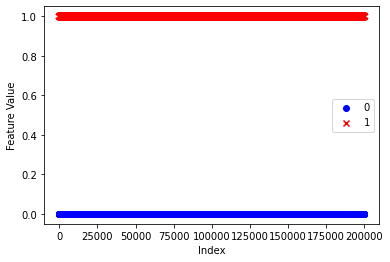

The number of 0s in the new balanced data is 199647
The number of 1s in the new balanced data is 199647


In [67]:
# Let us now look at the samples and see the visualization
# Creating some plot to see the data seperation
# separate 0 and 1 values into two Series
zeros = y_resampled.loc[y_resampled['isfraud'] == 0, 'isfraud']
ones = y_resampled.loc[y_resampled['isfraud'] == 1, 'isfraud']

# create scatter plots for 0 and 1 values
plt.scatter(range(len(zeros)), zeros, color='blue', marker='o', label='0')
plt.scatter(range(len(ones)), ones, color='red', marker='x', label='1')

# add axis labels and legend
plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.legend()

# show plot
plt.show()
print('The number of 0s in the new balanced data is', len(zeros))
print('The number of 1s in the new balanced data is', len(ones))

In [68]:
# Setting the training data.
xtrain = x_resampled.to_numpy()
ytrain = y_resampled.to_numpy()
xtest = x_test_normal.to_numpy()
ytrain.shape

(399294, 1)

In [69]:
# output target (y) - it is a binary 0/1 variable.
# So you can use sigmoid activation
y = ytrain
# input - 27 variables (columns)
x = xtrain

# number of input rows
nrows = xtrain.shape[0]
# number of columns
ncols = xtrain.shape[1]

print(nrows,ncols)

399294 27


In [70]:
def rand_split_train_test(features, label, train_perc=.8, random_state=42):
    """
    Shuffle the features and labels so they are in a random order.
        sklearn.utils.shuffle does this well.
    Then split the features and labels into training and testing sets
        where train_perc of the samples are in training and the
        remaining are for testing.
    """
    #features_shuffles, label_shuffle = shuffle(features, label, random_state=42)
    test_size = 1 - train_perc
    features_tr, features_te, label_tr, label_te = train_test_split(features, label, 
                                                                     train_size=train_perc,
                                                                     shuffle=True,
                                                                     random_state=random_state,
                                                                     stratify=label)
    
    return features_tr, features_te, label_tr, label_te

In [71]:
# Splitting the data between 80% training and 20% testing for getting the score
x_train, x_test, y_train, y_test = rand_split_train_test(x, y)

In [72]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model to the training data
model.fit(x_train, y_train, epochs=20, batch_size=32)

# evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

Epoch 1/20
9983/9983 [==============================] - 29s 3ms/step - loss: 0.1797 - accuracy: 0.9292
Epoch 2/20
9983/9983 [==============================] - 31s 3ms/step - loss: 0.1501 - accuracy: 0.9404
Epoch 3/20
9983/9983 [==============================] - 30s 3ms/step - loss: 0.1369 - accuracy: 0.9453
Epoch 4/20
9983/9983 [==============================] - 31s 3ms/step - loss: 0.1259 - accuracy: 0.9493
Epoch 5/20
9983/9983 [==============================] - 30s 3ms/step - loss: 0.1146 - accuracy: 0.9530
Epoch 6/20
9983/9983 [==============================] - 28s 3ms/step - loss: 0.1067 - accuracy: 0.9555
Epoch 7/20
9983/9983 [==============================] - 26s 3ms/step - loss: 0.1006 - accuracy: 0.9577
Epoch 8/20
9983/9983 [==============================] - 27s 3ms/step - loss: 0.0932 - accuracy: 0.9606
Epoch 9/20
9983/9983 [==============================] - 30s 3ms/step - loss: 0.0873 - accuracy: 0.9632
Epoch 10/20
9983/9983 [==============================] - 36s 4ms/step - l

In [73]:
# make class predictions with the model
ytest_prediction = model.predict(x_test)
# round it to make is either 0 or 1
ytest = np.round(ytest_prediction)

2496/2496 [==============================] - 4s 1ms/step


In [74]:
# Get its accuracy using sklearn classification report
print(classification_report(y_test, ytest))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     39930
           1       0.98      0.99      0.98     39929

    accuracy                           0.98     79859
   macro avg       0.98      0.98      0.98     79859
weighted avg       0.98      0.98      0.98     79859



In [75]:
# Get the Matthews Correlation Coefficient using sklearn matthews_corrcoef
print(round(matthews_corrcoef(y_test, ytest), 2))

0.97


As it can be seen that we have a good Matthews Correlation using the model that we had, therefore, we can now train our whole model on the entire dataset without splitting it for training and testing and then storing the output in csv file

In [76]:
final_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(xtrain.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
final_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model to the training data
final_model.fit(xtrain, ytrain, epochs=20, batch_size=32)

# evaluate the model on the test data
loss, accuracy = final_model.evaluate(xtrain, ytrain)
print('Test accuracy:', accuracy)

Epoch 1/20
12478/12478 [==============================] - 30s 2ms/step - loss: 0.1754 - accuracy: 0.9315
Epoch 2/20
12478/12478 [==============================] - 29s 2ms/step - loss: 0.1340 - accuracy: 0.9469
Epoch 3/20
12478/12478 [==============================] - 29s 2ms/step - loss: 0.1183 - accuracy: 0.9530
Epoch 4/20
12478/12478 [==============================] - 29s 2ms/step - loss: 0.1087 - accuracy: 0.9567
Epoch 5/20
12478/12478 [==============================] - 29s 2ms/step - loss: 0.1010 - accuracy: 0.9592
Epoch 6/20
12478/12478 [==============================] - 29s 2ms/step - loss: 0.0926 - accuracy: 0.9621
Epoch 7/20
12478/12478 [==============================] - 29s 2ms/step - loss: 0.0850 - accuracy: 0.9645
Epoch 8/20
12478/12478 [==============================] - 30s 2ms/step - loss: 0.0792 - accuracy: 0.9665
Epoch 9/20
12478/12478 [==============================] - 28s 2ms/step - loss: 0.0733 - accuracy: 0.9689
Epoch 10/20
12478/12478 [==============================

In [77]:
# make class predictions with the model
ytest_prediction = model.predict(xtest)
# round it to make is either 0 or 1
ytest = np.round(ytest_prediction)
ytest.shape

313/313 [==============================] - 0s 1ms/step


(10000, 1)

In [78]:
# y_test row numbers
ytest_id = np.arange(1,xtest.shape[0]+1)
ytest_id = np.reshape(ytest_id,(xtest.shape[0],1))
# combine y_test row numbers & prediction
data = np.concatenate((ytest_id,ytest),axis=1)
dff = pd.DataFrame(data,columns=['id','isfraud'])

In [80]:
# save on Local Drive - it will be on C drive "Download" folder
# CHANGE FILE NAME to YOUR LastName & FirstName
from google.colab import files

dff.to_csv('FI424_Competition_ytest_Bajaj_Rajaditya.csv',index=False) 
files.download('FI424_Competition_ytest_Bajaj_Rajaditya.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>